# Retrieving Gender Information in Common Nouns & Adjectives [to be finished]
In this Notebook : attempts to isolate Word Embeddings dimension coding for **gender information** (masculine/feminine) in a sample of Word Embeddings for **common Nouns** and **adjectives**.  
- Sample for Nouns = 3000 masculine NOUNS + 3000 feminine NOUNS  
- Sample for Adjectives = 

## 1. Nouns

### Results  

Candidate dimensions are listed in the table below. Colors highlight the fact that there is a large overlap between:  
- dimensions where masc_avg and fem_avg have the largest difference and dimensions that correlate the most to gender  
- dimensions showing lowest std for masculine WE and dimensions showing lowest std for feminine WE  
- interestingly, those two groups do not overlap

| Max diff(masc_avg, fem_avg) | Min std(masc) | Min std(fem) | Max corr(dim, gender) |  
| --- | --- | --- | --- |  
|  <span style='color:green'>100</span>  |  338 |  83 |  <span style='color:green'>100</span> |
|  <span style='color:green'>195</span>  |  <span style='color:blue'>408</span> |  <span style='color:blue'>314</span> |  <span style='color:green'>195</span> |
|  <span style='color:green'>117</span> |  <span style='color:blue'>287</span> |  <span style='color:blue'>287</span> |  <span style='color:green'>117</span> |
|  <span style='color:green'>202</span> |  321 |  <span style='color:blue'>365</span> |  <span style='color:green'>403</span> |
|  <span style='color:green'>403</span> |  101 |  <span style='color:blue'>408</span> |  <span style='color:green'>316</span>  |
|  <span style='color:green'>306</span> |  <span style='color:blue'>365</span> |  <span style='color:blue'>25</span> |  <span style='color:green'>306</span> |
|  <span style='color:green'>245</span> |  <span style='color:blue'>314</span> | <span style='color:blue'>209</span> |  <span style='color:green'>202</span> |
|  <span style='color:green'>316</span>  | <span style='color:blue'>209</span> | <span style='color:blue'>441</span> |  <span style='color:green'>245</span> |
|  <span style='color:green'>499</span>  | <span style='color:blue'>441</span> | 69 | 377 |
|  180 | <span style='color:blue'>25</span> |  63 | <span style='color:green'>499</span>  |  



A first look at the distribution of values for these dimensions between class of masculine nouns and class of feminine nouns allows us to state that:  
- dimensions in <span style="color:blue">blue</span> are not informative for gender. Indeed, they show intra-class low std, but also extra-class low std, meaning that they share similar values among all noun vectors. 
- dimensions 338, 321, 101, 83, 69 and 63 also have very similar distributions between masculine and feminine nouns. They are therefore not informative for gender.  
> **so intra-class low std isn't informative for our task**  

- The distributions are more separated for remaining dimensions and dimensions in <span style="color:green">green</span> in particular. However, the overlap is still very large, and the maximum correlation found between a dimension and gender is only **0.294138** (dimension 100).  



### 0. Data loading

In [1]:
import pandas as pd
top_freq_n = pd.read_csv('Most Frequent Words/top_frequent_pure_NOUN_FlauBERT.csv', index_col="Word")
top_freq_n = top_freq_n.drop(columns=[ "cgram", "freqlemlivres", "nombre"])
top_freq_n["frequency rank"] = range(1, 6357)
top_freq_n = top_freq_n.drop(columns=["Rang"])
top_masc_n = top_freq_n[top_freq_n["genre"] == "m"][:3000]# Sample of 3000 masculine Nouns
top_fem_n = top_freq_n[top_freq_n["genre"] == "f"][:3000]# Sample of 3000 feminine Nouns

In [2]:
top_masc_n.sort_values("Word").head()

,lemme,genre,frequency rank
Word,,,
abaissement,abaissement,m,4425
abandon,abandon,m,1246
abattage,abattage,m,4884
abattement,abattement,m,4214
abattoir,abattoir,m,3546


In [3]:
top_fem_n.sort_values("Word").head()

,lemme,genre,frequency rank
Word,,,
abbaye,abbaye,f,3787
abeille,abeille,f,2562
abeilles,abeille,f,2563
aberration,aberration,f,3604
ablation,ablation,f,4841


In [18]:
# Now getting the WE for our samples
all_n_we = pd.read_csv('all_nouns_we.csv', index_col=0).drop(columns=["gn", "gender"])

# Normalization
for i in range(512):
    values, copy = list(all_n_we[str(i)]), list(all_n_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_n_we[str(i)] = [val / (max_ - min_) for val in values]

all_n_we

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
abaisse,0.220459,-0.185174,0.045101,0.178714,-0.108041,-0.185223,-0.038133,-0.035881,0.206875,0.197348,...,-0.117108,0.185762,-0.084412,0.023871,-0.052849,-0.267209,-0.440458,-0.227911,-0.021792,-0.070034
abandonnée,0.186562,0.062755,0.030736,-0.143579,0.006462,-0.319613,-0.188934,-0.008268,-0.178685,-0.003653,...,-0.025086,0.023211,-0.053564,-0.200903,-0.081681,-0.337104,-0.226090,-0.244174,0.193163,-0.026614
abattue,0.260729,0.044799,0.100262,-0.003613,-0.014958,-0.248013,-0.062373,0.089560,0.103828,0.065361,...,-0.069399,0.038298,-0.067715,-0.088245,-0.185171,-0.425530,-0.397078,-0.164545,-0.047245,-0.010448
abbaye,0.205826,-0.215930,0.101201,0.006262,0.232492,-0.271341,-0.203044,-0.136419,-0.081058,0.065823,...,0.031419,-0.279662,0.199704,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.219602
abdominale,0.211081,-0.013678,0.240263,0.032897,0.017872,-0.184198,-0.119463,-0.360880,0.434171,0.266727,...,-0.065514,0.266714,-0.035179,-0.078115,-0.001525,-0.120634,-0.262442,-0.000265,0.190060,-0.191832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
événements,-0.059005,-0.037699,0.067933,0.216258,0.186763,-0.154193,-0.012498,0.108529,0.028374,-0.045180,...,0.033241,0.049204,-0.015031,-0.165675,0.123249,-0.085762,-0.165766,-0.297200,0.050490,0.042883
évêques,-0.015915,-0.219548,-0.061858,0.070170,0.108059,-0.037888,-0.104214,0.093217,0.180943,-0.001320,...,0.034633,-0.049661,-0.027990,-0.005807,-0.023432,-0.100197,-0.229627,-0.097213,-0.097342,-0.038175
êtres,0.170110,-0.209239,0.310894,0.106415,0.180311,-0.158953,0.129373,-0.008534,0.085612,0.043121,...,-0.185500,-0.073052,-0.135915,0.035351,-0.048647,0.001023,-0.178523,-0.093425,0.006703,-0.049017
îlots,0.014993,-0.236077,0.181549,0.145810,0.039679,-0.298001,-0.133297,0.200374,0.117919,0.076529,...,-0.013532,-0.111328,0.009125,0.040634,0.030117,-0.143250,-0.081994,-0.066614,-0.019787,0.007286


In [19]:

masc_n_we = all_n_we.merge(top_masc_n, left_index=True, right_index=True)
fem_n_we = all_n_we.merge(top_fem_n, left_index=True, right_index=True)

In [20]:
masc_n_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,genre,frequency rank
abaissement,0.152097,-0.126432,0.117128,0.007765,-0.055134,-0.285339,-0.039397,0.211560,0.020701,0.141178,...,-0.063982,0.087034,-0.162566,-0.450007,-0.259544,0.053780,-0.175741,abaissement,m,4425
abandon,0.182038,-0.097546,-0.059194,-0.203207,-0.093096,-0.209470,-0.240023,0.138944,-0.121443,-0.068391,...,-0.244310,0.038788,-0.349796,-0.241364,-0.119842,0.133536,-0.151044,abandon,m,1246
abattage,0.192036,-0.123198,0.159295,-0.094152,0.255045,-0.265857,0.082694,-0.121097,-0.171511,0.074709,...,0.000754,-0.300781,-0.101821,-0.270954,-0.097308,-0.083518,-0.224586,abattage,m,4884
abattement,0.059310,-0.181548,-0.117826,-0.149057,0.124040,-0.343145,-0.090566,-0.138776,-0.151268,0.133556,...,-0.096741,-0.139711,-0.117751,-0.331659,0.092237,0.054946,-0.114384,abattement,m,4214
abattoir,0.270580,-0.012385,0.069551,-0.137998,0.210999,-0.260931,-0.101342,-0.050916,-0.200305,0.062596,...,-0.046674,-0.224210,-0.093587,-0.243948,-0.006945,-0.029372,0.007851,abattoir,m,3546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évêque,-0.005564,-0.335026,-0.230829,0.038320,0.071738,-0.006233,-0.006746,0.120293,0.152661,-0.087296,...,0.031858,0.013321,-0.164476,-0.267662,0.123380,-0.104922,-0.112248,évêque,m,1668
évêques,-0.015915,-0.219548,-0.061858,0.070170,0.108059,-0.037888,-0.104214,0.093217,0.180943,-0.001320,...,-0.005807,-0.023432,-0.100197,-0.229627,-0.097213,-0.097342,-0.038175,évêque,m,1669
êtres,0.170110,-0.209239,0.310894,0.106415,0.180311,-0.158953,0.129373,-0.008534,0.085612,0.043121,...,0.035351,-0.048647,0.001023,-0.178523,-0.093425,0.006703,-0.049017,être,m,269
îlot,0.243576,-0.341469,0.249419,0.039786,0.065335,-0.199687,-0.094007,0.230934,0.099218,0.072723,...,0.020394,0.093106,-0.050414,-0.074702,-0.024911,0.068336,-0.126848,îlot,m,2454


In [21]:
fem_n_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,genre,frequency rank
abbaye,0.205826,-0.215930,0.101201,0.006262,0.232492,-0.271341,-0.203044,-0.136419,-0.081058,0.065823,...,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.219602,abbaye,f,3787
abeille,0.251210,0.087191,0.097508,0.001923,0.388964,-0.230837,0.026582,-0.095390,-0.000336,-0.002768,...,-0.138640,-0.051093,0.111705,-0.098257,-0.034586,0.203806,-0.026769,abeille,f,2562
abeilles,0.237514,0.040694,0.083609,0.074358,0.360962,-0.280100,0.000528,-0.044016,0.039401,0.024748,...,-0.091038,-0.073157,0.145899,-0.187879,-0.070264,0.211490,0.094784,abeille,f,2563
aberration,0.288274,-0.087455,0.225664,-0.016001,-0.094370,-0.076538,-0.014989,0.097900,0.137593,0.184709,...,-0.068834,0.158387,0.005355,-0.343424,-0.380106,0.281211,0.070189,aberration,f,3604
ablation,0.333784,-0.043799,0.151581,0.022872,0.315121,-0.162544,-0.219209,-0.114440,0.283275,0.168977,...,0.058709,-0.010911,-0.072521,-0.308949,-0.076806,0.167638,-0.012378,ablation,f,4841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évocation,-0.063729,-0.049915,0.128177,-0.106176,0.064877,-0.195949,-0.184539,0.164092,0.045645,-0.069215,...,-0.022433,-0.070149,-0.225608,-0.189020,-0.224651,0.296329,-0.118221,évocation,f,2732
évolution,0.069514,-0.408729,0.156890,0.161850,0.148964,-0.355523,0.125804,0.016782,-0.096418,0.082270,...,0.033183,0.178403,-0.131047,-0.313971,-0.263555,-0.063691,-0.024714,évolution,f,2082
évolutions,-0.017962,-0.333781,0.150314,0.220495,0.142030,-0.325986,-0.069320,-0.042089,-0.143193,0.049199,...,0.110588,0.159408,-0.119857,-0.246614,-0.231884,-0.066337,0.065323,évolution,f,2083
île,-0.023182,-0.172514,-0.136652,0.174805,0.051507,-0.269676,-0.021480,0.144106,0.108643,-0.132123,...,-0.011184,0.180770,-0.190158,-0.219983,-0.368726,-0.085042,-0.177966,île,f,298


In [22]:
# WE for nouns of all genders
all_n_we = pd.concat([masc_n_we, fem_n_we])
gender_values = [0]*3000 + [1]*3004
all_n_we["gender"] = gender_values
all_n_we[:10]

C:\Users\bleuze3u\AppData\Local\Temp\ipykernel_4012\2160966589.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_n_we["gender"] = gender_values


,0,1,2,3,4,5,6,7,8,9,...,506,507,508,509,510,511,lemme,genre,frequency rank,gender
abaissement,0.152097,-0.126432,0.117128,0.007765,-0.055134,-0.285339,-0.039397,0.211560,0.020701,0.141178,...,0.087034,-0.162566,-0.450007,-0.259544,0.053780,-0.175741,abaissement,m,4425,0
abandon,0.182038,-0.097546,-0.059194,-0.203207,-0.093096,-0.209470,-0.240023,0.138944,-0.121443,-0.068391,...,0.038788,-0.349796,-0.241364,-0.119842,0.133536,-0.151044,abandon,m,1246,0
abattage,0.192036,-0.123198,0.159295,-0.094152,0.255045,-0.265857,0.082694,-0.121097,-0.171511,0.074709,...,-0.300781,-0.101821,-0.270954,-0.097308,-0.083518,-0.224586,abattage,m,4884,0
abattement,0.059310,-0.181548,-0.117826,-0.149057,0.124040,-0.343145,-0.090566,-0.138776,-0.151268,0.133556,...,-0.139711,-0.117751,-0.331659,0.092237,0.054946,-0.114384,abattement,m,4214,0
abattoir,0.270580,-0.012385,0.069551,-0.137998,0.210999,-0.260931,-0.101342,-0.050916,-0.200305,0.062596,...,-0.224210,-0.093587,-0.243948,-0.006945,-0.029372,0.007851,abattoir,m,3546,0
abattoirs,0.196548,0.002573,0.090672,-0.082415,0.119058,-0.395301,-0.063356,-0.071227,-0.260107,0.115566,...,-0.205721,-0.032653,-0.289550,-0.077530,-0.043718,-0.031319,abattoir,m,3547,0
abbé,0.204040,-0.206447,-0.052257,0.106810,0.177343,-0.154771,-0.007465,-0.048274,0.036594,0.011264,...,0.035792,-0.148269,-0.318278,0.084074,-0.127497,-0.253124,abbé,m,1053,0
abdomen,0.312268,-0.019958,0.093893,0.042629,0.113769,-0.073651,-0.023749,-0.204236,0.417525,0.030202,...,0.142851,-0.022779,-0.282723,0.084967,0.068223,-0.010800,abdomen,m,4727,0
able,0.204874,-0.282834,-0.066516,0.072133,0.132853,0.021105,0.027874,0.411362,0.221941,0.005143,...,-0.071070,-0.198048,-0.217528,-0.090030,-0.012458,0.229816,able,m,5841,0
abonnement,0.379931,-0.157372,-0.029860,0.082721,0.138696,-0.008611,-0.022705,-0.225414,0.193982,0.055891,...,0.119096,-0.193003,-0.283274,-0.028317,0.238156,-0.087088,abonnement,m,4693,0


### 1.  Dimensions with greatest difference between avg_masc and avg_fem

In [23]:
# Creating average WE for class masculine and class feminine
dim_indices = range(512)
avg_values_masc = [masc_n_we[str(i)].mean() for i in dim_indices]
avg_values_fem = [fem_n_we[str(i)].mean() for i in dim_indices]
d = [abs(m-f) for m,f in zip(avg_values_masc, avg_values_fem)]
diff={d[i]:i for i in dim_indices}

masc_avg = pd.DataFrame([avg_values_masc], index=["masc_avg"], columns=dim_indices)
fem_avg = pd.DataFrame([avg_values_fem], index=["fem_avg"], columns=dim_indices)

In [24]:
masc_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
masc_avg,0.120936,-0.09337,-0.00378,-0.021019,0.053085,-0.117852,-0.101085,-0.009107,0.040596,0.033653,...,-0.04749,0.017343,0.059121,-0.077131,-0.034504,-0.12049,-0.180719,-0.132132,0.043822,-0.091011


In [25]:
fem_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
fem_avg,0.113612,-0.087398,0.040471,-0.016422,0.072341,-0.130215,-0.104049,-0.022927,0.049935,0.051573,...,-0.033319,0.040013,0.028287,-0.076379,-0.005196,-0.16199,-0.202025,-0.154884,0.064646,-0.105749


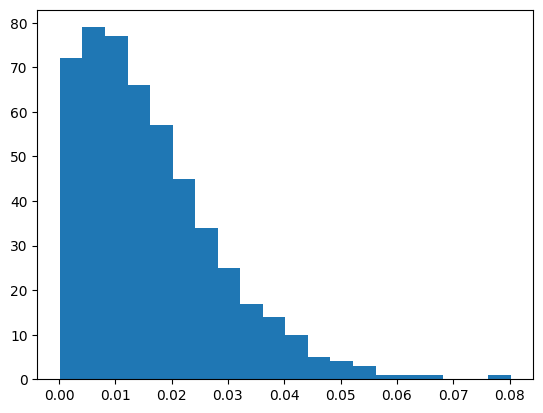

In [26]:
# Plotting distribution of the difference between the two average vectors
from matplotlib import pyplot as plt 
plt.hist(d, bins=20)
plt.show()

In [27]:
# Finding top-10 difference
d.sort(reverse=True)
n = 10
topn = []
for v in d[:n]:
    print(diff[v], v)
    topn.append(diff[v])

print(topn)

100 0.080228636004463
195 0.06486787893401713
117 0.062316128084632244
202 0.05768499121154671
403 0.05542757482351765
306 0.05497850060255706
245 0.05353575157676573
316 0.051878818144571195
499 0.05180695596176521
180 0.0500931621566402
[100, 195, 117, 202, 403, 306, 245, 316, 499, 180]


### 2. Dimensions with intra class lowest std

In [28]:
masc_n_we.loc[:,:'511'].std().sort_values()[:10]

338    0.098987
408    0.099500
287    0.100191
321    0.100997
101    0.101455
365    0.101886
314    0.102984
209    0.103369
441    0.103530
25     0.103697
dtype: float64

In [29]:
masc_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]

492    0.144385
347    0.143648
202    0.143534
476    0.142528
361    0.142357
342    0.141391
272    0.141175
212    0.140849
258    0.140620
dtype: float64

We observe that highest std values are quite close to the lowest ones. So std seems to be low for the majority of masculine WE dimensions.

In [32]:
fem_n_we.loc[:,:'511'].std().sort_values()[:10]

83     0.095393
314    0.096907
287    0.096957
365    0.097200
408    0.098304
25     0.098738
209    0.099702
441    0.099839
69     0.100146
63     0.100184
dtype: float64

In [33]:
fem_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]

272    0.145740
54     0.144081
475    0.142893
476    0.142235
132    0.142169
361    0.141013
251    0.139943
180    0.139503
199    0.139334
dtype: float64

Same remark for feminine nouns.

Dimensions 314, 287, 365, 408, 25, 209 and 441 appear in the top-10-lowest-std for both feminine and masculine nouns. We will now observe whether the values for these dimensions are distributed equally among those two classes or not.

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

#### Distribution for dimensions 314, 287, 365 [m,f]

<AxesSubplot: xlabel='365', ylabel='Count'>

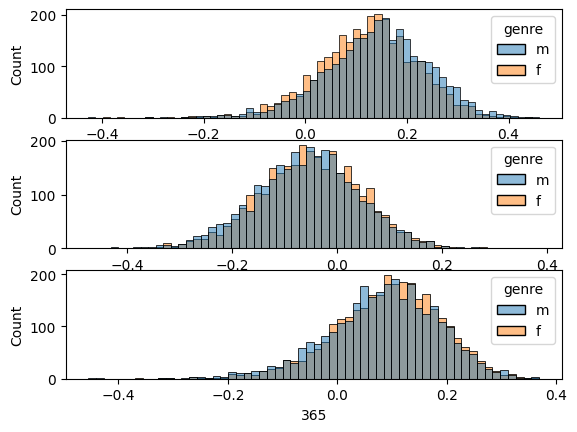

In [35]:
fig, axs = plt.subplots(3,1)
sns.histplot(data = all_n_we, x = "314", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "287", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "365", hue='genre', ax=axs[2])

#### Distribution for dimensions 408, 25, 209, 441 [m,f]

<AxesSubplot: xlabel='441', ylabel='Count'>

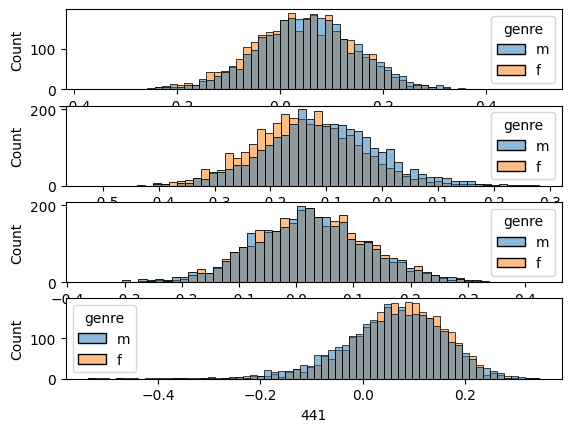

In [36]:
fig, axs = plt.subplots(4,1)
sns.histplot(data = all_n_we, x = "408", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "25", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "209", hue='genre', ax=axs[2])
sns.histplot(data = all_n_we, x = "441", hue='genre', ax=axs[3])

So these 7 dimensions not only have intra-classes low std, but also extra-class low std. We reject the hypothesis that they encode gender. However, maybe they encode noun-ness.  
We will now plot the distributions of the dimensions that have low std only for masculine or for feminine nouns.

#### Distribution for dimensions 338, 321, 101 [m]

<AxesSubplot: xlabel='101', ylabel='Count'>

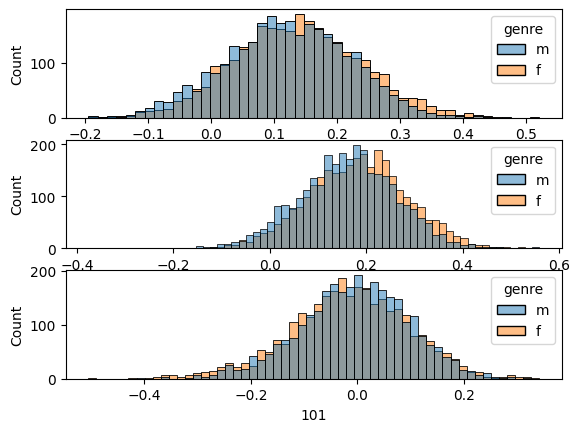

In [37]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "338", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "321", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "101", hue='genre', ax=axs[2])

Once again, the distributions are largely overlapping between WE of masculine or feminine nouns.

#### Distribution for dimensions 83, 69, 63 [f]

<AxesSubplot: xlabel='63', ylabel='Count'>

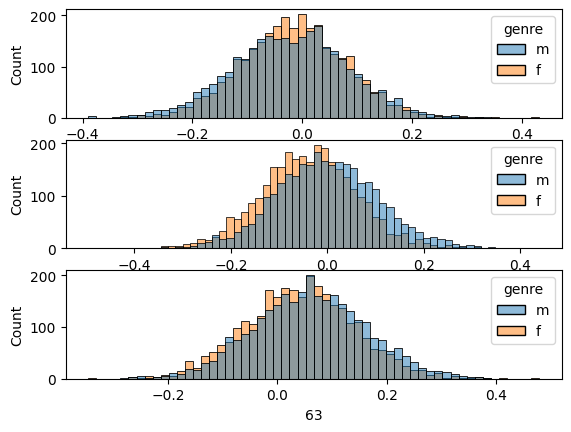

In [38]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "83", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "69", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "63", hue='genre', ax=axs[2])

So none of them seem like good candidates for encoding gender. 

### 3. Correlation study

In [39]:
import numpy as np
gender_corr_df = pd.DataFrame(columns=["correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(all_n_we.loc[:,[str(i), 'gender']].corr().iloc[0][-1])

gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [40]:
# Dimensions having the highest abs correlation with gender
gender_corr_df.sort_values("abs")[-10:][::-1]

,correlation_with_gender,sign,abs
100,0.294138,1.0,0.294138
195,0.265500,1.0,0.265500
117,0.234024,1.0,0.234024
403,0.227832,1.0,0.227832
316,-0.211124,-1.0,0.211124
306,0.210509,1.0,0.210509
202,-0.202084,-1.0,0.202084
245,-0.200253,-1.0,0.200253
377,-0.195400,-1.0,0.195400
499,-0.194677,-1.0,0.194677


Dimensions 100, 195, 117, 403, 306, 202 and 245 were already found among the top10 with largest difference between masc_avg and fem_avg. We'll test these first.

#### Distribution for dimensions 100, 195, 117 [corr, avg_diff]

<AxesSubplot: xlabel='117', ylabel='Count'>

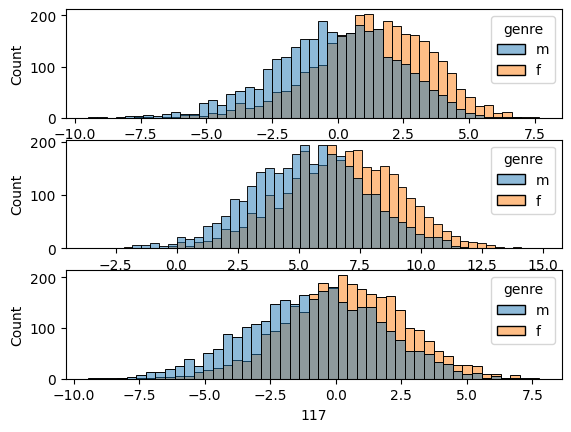

In [204]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "100", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "195", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "117", hue='genre', ax=axs[2])

#### Distribution for dimensions 403, 306, 202, 245 [corr, avg_diff]

<AxesSubplot: xlabel='245', ylabel='Count'>

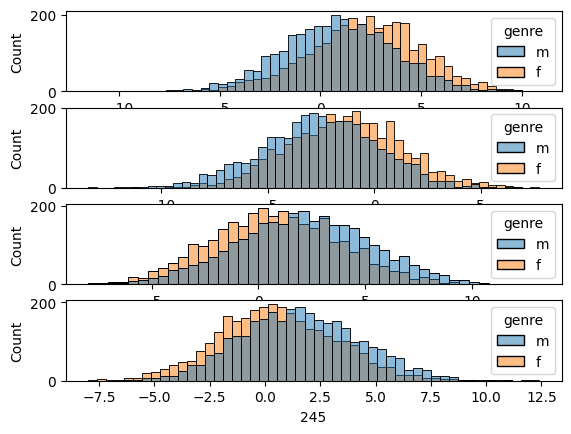

In [205]:
fig, axs = plt.subplots(4,1)
sns.histplot(data = all_n_we, x = "403", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "306", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "202", hue='genre', ax=axs[2])
sns.histplot(data = all_n_we, x = "245", hue='genre', ax=axs[3])

#### Distribution for dimensions 316, 377, 499 [corr]

<AxesSubplot: xlabel='499', ylabel='Count'>

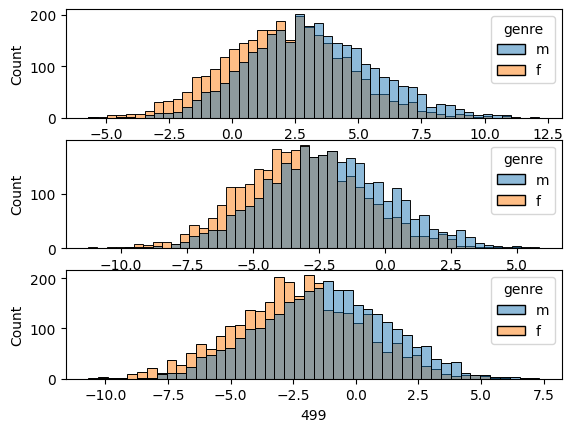

In [206]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "316", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "377", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "499", hue='genre', ax=axs[2])

#### Distribution for dimensions 371, 293, 168 [avg_diff]

<AxesSubplot: xlabel='168', ylabel='Count'>

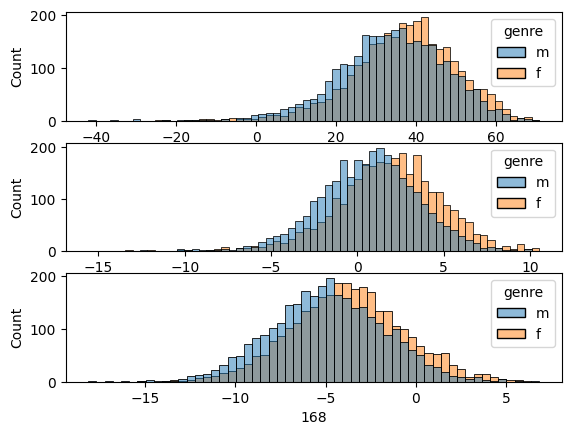

In [207]:
fig, axs = plt.subplots(3,1)

sns.histplot(data = all_n_we, x = "371", hue='genre', ax=axs[0])
sns.histplot(data = all_n_we, x = "293", hue='genre', ax=axs[1])
sns.histplot(data = all_n_we, x = "168", hue='genre', ax=axs[2])

### 4. Dimension analysis : 100 
From the distribution, we see that feminine nouns tend to have higher values for this dimension that masculine nouns.

<AxesSubplot: xlabel='100', ylabel='Count'>

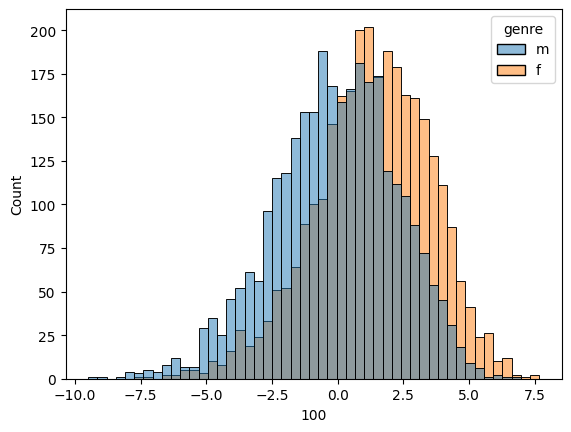

In [208]:
sns.histplot(data = all_n_we, x = "100", hue='genre')

#### Low values

In [209]:
masc_n_we.sort_values("100")[:20][["100", "frequency rank"]]

,100,frequency rank
caisson,-9.491594,4049
yoga,-8.974237,5074
vice,-8.308041,1744
bambou,-8.030970,3215
yaourt,-8.020215,3543
chêne,-8.003265,1424
physicien,-7.940891,4753
culot,-7.538586,2983
bouddhisme,-7.522584,4569
chevet,-7.458227,1707


In [214]:
fem_n_we.sort_values("100")[:20][["100", "frequency rank"]]

,100,frequency rank
horlogerie,-7.555670,5044
minijupe,-7.221744,5456
pérennité,-6.594504,5298
courge,-6.411068,5170
homonymie,-6.280455,5718
aches,-6.095542,5764
spéculations,-5.944426,3756
lady,-5.845141,3981
investigations,-5.815174,4253
fosse,-5.792221,2096


In [210]:
fem_n_we.sort_values("100")[:-20:-1][["100", "frequency rank"]]

,100,frequency rank
attitude,7.664237,509
visibilité,7.378869,4767
prestation,7.072073,4386
rapidité,6.745102,2466
brochure,6.641384,3726
implémentation,6.542789,6213
manifestation,6.526750,1828
affluence,6.361046,4215
présence,6.359909,235
distribution,6.348384,2699


In [215]:
masc_n_we.sort_values("100")[:-20:-1][["100", "frequency rank"]]

,100,frequency rank
tee,6.732176,5686
pal,6.382740,5187
inconfort,6.189135,4448
quotas,6.123842,5522
tac,5.575114,3557
centimes,5.552419,3304
événement,5.496104,397
entrain,5.470120,2854
créneaux,5.444445,3379
créneau,5.382375,3378


Although no clear statement can be done, it seems that low values on dim 100 correlate with words depicting animal/mineral/beings/food or at least physical and concrete beings and artefacts (bambou, chêne, dinosaures, requin, noisettes, araignées) - but this is more visible in masculine nouns.

Higher values seem to correlate more with abstract concepts and qualities or places (attitude, visibilité, manifestation, sévérité, tarification, dédain, inconfort). For feminine nouns with higher values, a higher register of langage is seen that in masculine nouns with higher values.

## 2. Adjectives  
We will now study adjectives the same way.

### Results  
- Dimensions: 234, 466, 133, 507, 436, 88, 439, 180, 276, 5 have the highest correlation with gender (ranging from 0.41 to 0.30)  
- None of these dimensions were considered as candidates for gender encoding in the previous experiment with nouns

### 0. Data loading

In [42]:
import pandas as pd
top_freq_a = pd.read_csv('Most Frequent Words/top_frequent_pure_ADJ_FlauBERT.csv', index_col="Word")
top_freq_a = top_freq_a.drop(columns=[ "cgram", "freqlemlivres", "Unnamed: 0"])
top_masc_a = top_freq_a[top_freq_a["genre"] == "m"][:319]
top_fem_a = top_freq_a[top_freq_a["genre"] == "f"] [:319]

In [43]:
top_masc_a

,lemme,genre,number
Word,,,
sûr,sûr,m,singular
sûrs,sûr,m,plural
aucun,aucun,m,singular
léger,léger,m,singular
cher,cher,m,singular
...,...,...,...
relationnel,relationnel,m,singular
salariaux,salarial,m,plural
sociétal,sociétal,m,singular


In [44]:
top_fem_a

,lemme,genre,number
Word,,,
vraies,vrai,f,plural
sûre,sûr,f,singular
sûres,sûr,f,plural
pleines,plein,f,plural
certaine,certain,f,singular
...,...,...,...
avoisinantes,avoisinant,f,plural
abusive,abusif,f,singular
inhérente,inhérent,f,singular


In [45]:
# Now getting the WE for our samples
all_a_we = pd.read_csv('all_adjectives_we.csv', index_col=0)
# Normalization
for i in range(512):
    values, copy = list(all_a_we[str(i)]), list(all_a_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_a_we[str(i)] = [val / (max_ - min_) for val in values]

masc_a_we = all_a_we.merge(top_masc_a, left_index=True, right_index=True)
fem_a_we = all_a_we.merge(top_fem_a, left_index=True, right_index=True)

In [46]:
masc_a_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,genre,number
abusif,0.232243,0.033344,0.064536,-0.196239,0.113180,0.090435,0.207102,-0.000537,0.040615,0.053037,...,-0.051813,-0.071007,-0.038310,-0.232066,0.159592,0.021017,0.185363,abusif,m,singular
additionnel,-0.029438,-0.256993,0.078997,-0.165441,-0.264457,-0.232052,0.005940,0.056177,0.332335,0.120431,...,-0.087006,-0.094080,0.019532,-0.292846,0.008406,-0.013895,-0.055120,additionnel,m,singular
adjacent,0.261468,-0.099919,0.214755,-0.210912,0.040950,0.043514,-0.031074,0.202241,0.246993,0.061476,...,-0.066966,0.135331,-0.107114,-0.069571,-0.005343,-0.013158,-0.066654,adjacent,m,singular
adéquat,0.141874,-0.097473,-0.031900,0.021173,0.183390,-0.115273,-0.124539,0.053133,0.009355,-0.067926,...,0.014423,-0.111678,-0.083379,-0.231007,-0.202247,0.051852,-0.210482,adéquat,m,singular
aisé,0.422322,-0.000093,0.218442,-0.113790,0.142027,-0.091921,-0.063214,0.159690,-0.095112,0.077389,...,-0.123318,-0.044726,-0.135971,0.071106,-0.044256,-0.159577,0.016583,aisé,m,singular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
éducatifs,0.198737,-0.074804,0.122109,-0.177624,0.025707,-0.232851,0.058314,0.124873,0.121141,-0.081414,...,-0.106879,0.177074,0.118257,-0.169384,-0.213185,0.200304,-0.165872,éducatif,m,plural
électoraux,0.077047,-0.080319,0.037810,0.066900,0.198574,0.001384,-0.269530,-0.003956,-0.117808,-0.206716,...,-0.232911,0.073276,-0.245405,-0.012879,-0.229373,-0.120853,0.098090,électoral,m,plural
éminents,0.106095,-0.164565,0.156514,0.267330,-0.054093,-0.001233,0.000370,0.048781,0.127721,-0.253909,...,-0.167147,0.004121,-0.008354,-0.061515,0.046898,-0.200744,-0.019407,éminent,m,plural
évidents,0.179477,-0.024173,0.184015,0.070848,-0.013959,-0.118027,-0.102712,0.070742,-0.026969,-0.061659,...,-0.003183,0.107186,-0.026349,-0.015416,-0.388719,0.081611,-0.085689,évident,m,plural


In [47]:
fem_a_we

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,genre,number
abondante,0.178926,-0.244048,0.052840,-0.061612,0.316563,-0.277504,-0.083215,-0.110003,0.039679,0.117515,...,-0.067298,-0.358787,-0.191599,-0.169430,-0.132200,0.000891,-0.068334,abondant,f,singular
abondantes,0.117818,-0.128436,-0.030330,0.038303,0.363063,-0.259530,-0.085311,-0.191021,0.104091,0.151237,...,-0.037240,-0.281590,-0.171069,-0.001043,-0.234767,-0.114596,-0.056048,abondant,f,plural
abusive,0.251555,0.004331,0.015431,-0.119035,0.113863,-0.093146,0.110308,-0.173100,0.038541,0.139468,...,-0.080038,-0.157125,-0.107516,-0.234810,-0.092033,-0.039054,0.018799,abusif,f,singular
accueillante,0.047184,-0.041540,0.179287,-0.229055,0.071703,-0.323448,-0.018608,0.170100,0.143360,0.000612,...,-0.064995,-0.202738,-0.174889,-0.268868,-0.086116,0.096441,0.290723,accueillant,f,singular
agressives,0.038474,-0.102596,0.137712,-0.264782,0.083168,-0.227989,-0.001683,-0.162360,0.058863,0.179397,...,-0.098655,-0.234700,-0.151276,-0.324599,-0.162312,0.071099,0.119444,agressif,f,plural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étonnantes,0.100239,-0.096943,0.105497,0.144202,0.123097,-0.311440,-0.111961,0.314828,0.014692,0.064879,...,0.107006,0.000398,0.002575,-0.098760,-0.188109,0.245413,0.078175,étonnant,f,plural
éventuelle,-0.124548,-0.163088,-0.011032,0.074345,-0.148452,0.010151,-0.033978,-0.024577,0.285975,-0.204533,...,-0.189280,0.011059,-0.101568,-0.307061,-0.042025,0.145998,0.093796,éventuel,f,singular
éventuelles,-0.216523,-0.101876,-0.100012,0.012300,-0.029418,-0.180825,-0.049696,-0.213698,0.252523,-0.072447,...,-0.264718,-0.002919,-0.006518,-0.436265,-0.135772,0.223473,-0.011749,éventuel,f,plural
évidente,0.229869,-0.073161,0.239592,-0.057249,0.077572,-0.103033,-0.228700,0.053446,0.006584,-0.032437,...,-0.014801,0.100656,-0.107644,-0.087151,-0.337647,0.069022,-0.188642,évident,f,singular


In [48]:
# WE for adjectives of all genders
all_a_we = pd.concat([masc_a_we, fem_a_we])
all_a_we[:10]

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,lemme,genre,number
abusif,0.232243,0.033344,0.064536,-0.196239,0.113180,0.090435,0.207102,-0.000537,0.040615,0.053037,...,-0.051813,-0.071007,-0.038310,-0.232066,0.159592,0.021017,0.185363,abusif,m,singular
additionnel,-0.029438,-0.256993,0.078997,-0.165441,-0.264457,-0.232052,0.005940,0.056177,0.332335,0.120431,...,-0.087006,-0.094080,0.019532,-0.292846,0.008406,-0.013895,-0.055120,additionnel,m,singular
adjacent,0.261468,-0.099919,0.214755,-0.210912,0.040950,0.043514,-0.031074,0.202241,0.246993,0.061476,...,-0.066966,0.135331,-0.107114,-0.069571,-0.005343,-0.013158,-0.066654,adjacent,m,singular
adéquat,0.141874,-0.097473,-0.031900,0.021173,0.183390,-0.115273,-0.124539,0.053133,0.009355,-0.067926,...,0.014423,-0.111678,-0.083379,-0.231007,-0.202247,0.051852,-0.210482,adéquat,m,singular
aisé,0.422322,-0.000093,0.218442,-0.113790,0.142027,-0.091921,-0.063214,0.159690,-0.095112,0.077389,...,-0.123318,-0.044726,-0.135971,0.071106,-0.044256,-0.159577,0.016583,aisé,m,singular
ambiant,0.047688,-0.116456,0.084901,-0.244017,0.005064,-0.181570,-0.062389,0.259812,-0.040124,0.101255,...,0.029503,0.097510,-0.117168,-0.229539,-0.211522,0.116165,-0.078129,ambiant,m,singular
annuel,0.116955,-0.165788,0.118512,0.165539,0.141674,-0.138841,0.042886,0.055736,0.249918,0.037785,...,0.255116,0.067457,-0.085998,-0.210988,-0.075933,0.008625,-0.223314,annuel,m,singular
anodin,-0.059600,-0.129969,0.157914,0.142797,-0.120434,-0.012912,-0.159040,0.144129,-0.004070,-0.126341,...,-0.068659,-0.103468,-0.010769,-0.221245,-0.303472,0.006453,-0.021425,anodin,m,singular
architectural,0.389483,-0.355651,0.301400,-0.150081,0.000727,-0.052651,-0.133369,0.247794,0.050411,0.120567,...,-0.109513,0.054313,-0.201683,-0.247692,-0.007761,0.152410,-0.235464,architectural,m,singular
artisanal,0.336817,-0.257807,0.315184,0.020822,0.216081,-0.115713,0.002440,-0.014594,-0.254614,0.027580,...,-0.089400,-0.094737,-0.179395,-0.065509,-0.128773,-0.361407,-0.251937,artisanal,m,singular


### 1. Correlation study

In [26]:
all_a_we["gender"] = [1 if g =="f" else 0 for g in all_a_we["genre"]]

In [28]:
import numpy as np
gender_corr_df = pd.DataFrame(columns=["correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(all_a_we.loc[:,[str(i), 'gender']].corr().iloc[0][-1])

gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [29]:
# Dimensions having the highest abs correlation with gender
gender_corr_df.sort_values("abs")[-10:][::-1]

,correlation_with_gender,sign,abs
234,-0.416054,-1.0,0.416054
466,-0.341021,-1.0,0.341021
133,0.334722,1.0,0.334722
507,-0.324224,-1.0,0.324224
436,-0.323262,-1.0,0.323262
88,0.318893,1.0,0.318893
439,0.311085,1.0,0.311085
180,0.307419,1.0,0.307419
276,0.303118,1.0,0.303118
5,-0.301922,-1.0,0.301922


Interestingly, the correlations found here are way higher that in the experiment with nouns. There is a clear difference between the highest correlation (0.41) and the following ones, all included in the interval [0.30, 0.34].

### 3. Dimension 234

<AxesSubplot: xlabel='234', ylabel='Count'>

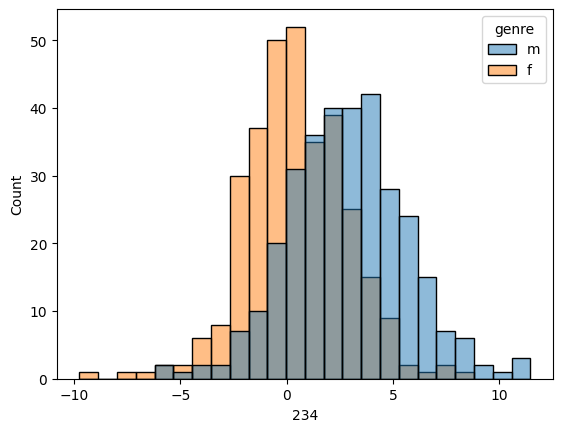

In [30]:
import seaborn as sns
sns.histplot(data = all_a_we, x = "234", hue='genre')

Masculine adjectives tend to have higher values for this dimension than feminine adjectives.

In [33]:
masc_a_we.sort_values("234")[:-20:-1]["234"]

encourageants          11.471114
tropical               11.263194
mûrs                   10.844193
trimestriels           10.583638
tropicaux               9.139940
inchangé                8.845234
opérationnel            8.721978
cutané                  8.668478
instructif              8.626164
trimestriel             8.578044
informatif              8.342056
consécutif              8.157940
cognitifs               7.622808
moraux                  7.455216
départemental           7.391819
floral                  7.280742
cognitif                7.270613
cohérent                7.249718
intergouvernemental     7.243884
Name: 234, dtype: float64

In [35]:
fem_a_we.sort_values("234")[:20]["234"]

maintes          -9.749328
charmante        -7.887375
accueillante     -6.359057
charmantes       -5.604196
bienveillante    -5.473552
attentive        -5.305023
continuelle      -4.554802
grossière        -3.950494
croissante       -3.811427
régulières       -3.668194
publiques        -3.632792
jolie            -3.631820
jolies           -3.580804
inexistante      -3.195949
touchante        -3.195436
grandissante     -3.168917
pressante        -3.077214
décorative       -3.067574
imposante        -2.992928
reconnaissante   -2.960694
Name: 234, dtype: float64